# outlier treatment 

outliers are redundant observations. bcz they spoil the performance of the model.
Defination : points which are extremly far from the normal observations.

# Where do they come from:

1. Human error: data entry error
2. system error: measurment error
3. use of psudo data: dummy dataset, fake data
4. sampling error: creating or processing dataset using wrong functions
5. data merging : mixing of datasets
6. Natural error: most of the errors might belong to this category


# Treating of outliers:

1. dropping
2. winitializing (replacing the outliers with statistical computations (mean, median, mode etc..))
3. Thresold split
4. Normalizing
5. Tranformation:
1. log transform
2. Noramlization (0-1)
3. standardization (-1 to 1)
4. box-cox transform
5. sqrt transform
6. cbrt transform
7. reciprocal transform

# Algorithms that are not affected by outliers:

* Decision Tree,
* Random Forest
* Adaboost, Xgboost
* Naive Baiyes

# Algorithms that are affected by outliers:

* Linear Regression
* Logistic Regression
* K-NN
* SVM
* K-means clustering

# Detecting outliers

* check if the data is noramlly distributed
* shapiro test, normality test, kstest

In [1]:
import numpy as np

In [2]:
array = np.random.randint(10,100,size=20)
array

array([73, 50, 75, 73, 13, 72, 85, 60, 24, 84, 88, 80, 63, 82, 70, 43, 82,
       35, 57, 84])

<Axes: ylabel='Density'>

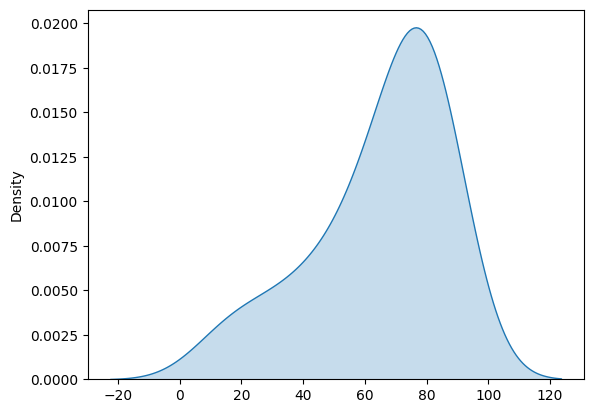

In [3]:
import seaborn as sns
sns.kdeplot(array,fill=True)

In [4]:
array2 =array.copy()
array2[10]=200
array2[12]=250
array2[5]=-200
array2

array([  73,   50,   75,   73,   13, -200,   85,   60,   24,   84,  200,
         80,  250,   82,   70,   43,   82,   35,   57,   84])

<Axes: ylabel='Density'>

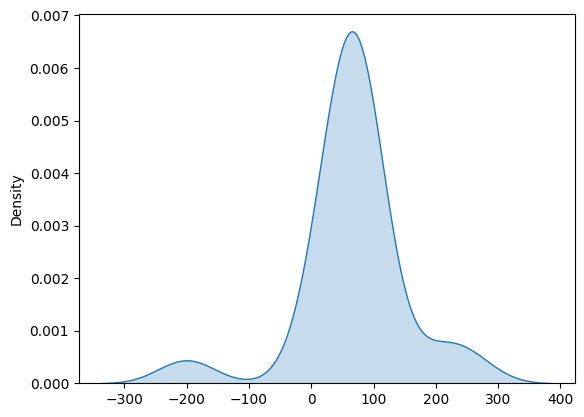

In [5]:
sns.kdeplot(array2,fill=True)

# Z-score Normalization

z_score = (x_value -x_mean)/std
Idea is calculating z_score & setting up a thresold such that all the datapoints above the thresold or below the thresold are outliers & can be
eliminated.

In [6]:
mean = np.mean(array2)
std = np.std(array2)
print(f'mean is {mean} and standard deviation is {std}')
outlier_list=[]
thresold = 1.5

for x_val in array2:
    z_score = (x_val-mean)/std
    z_score = np.abs(z_score)
    print(z_score)
    
    if z_score>=thresold:
        outlier_list.append(x_val)

outlier_list

mean is 66.0 and standard deviation is 80.90611843365123
0.08652003254538157
0.1977600743894436
0.11124004184406201
0.08652003254538157
0.6550802464150318
3.2877612367244997
0.23484008833746425
0.07416002789604134
0.5191201952722894
0.22248008368812403
1.65624062301159
0.17304006509076314
2.274240855478601
0.1977600743894436
0.0494400185973609
0.28428010693482514
0.1977600743894436
0.38316014412954696
0.11124004184406201
0.22248008368812403


[-200, 200, 250]

In [7]:
np.where(array2<=min(outlier_list),np.mean(array2),array2)

array([ 73.,  50.,  75.,  73.,  13.,  66.,  85.,  60.,  24.,  84., 200.,
        80., 250.,  82.,  70.,  43.,  82.,  35.,  57.,  84.])

# using IQR -> Inter Quantile Range

In [8]:
array

array([73, 50, 75, 73, 13, 72, 85, 60, 24, 84, 88, 80, 63, 82, 70, 43, 82,
       35, 57, 84])

In [10]:
q1 =np.quantile(array,0.25)
q1

55.25

In [12]:
q2 =np.quantile(array,0.5)
q2

72.5

In [13]:
q3 =np.quantile(array,0.75)
q3

82.0

In [14]:
import pandas as pd 
pd.Series(array).describe()

count    20.000000
mean     64.650000
std      21.570631
min      13.000000
25%      55.250000
50%      72.500000
75%      82.000000
max      88.000000
dtype: float64

IQR
* Q1 >> 1st quantile >> 25th percentile of the data
* Q2 >> 2nd quantile >> 50th percentile of the data / Median
* 03 >> 3rd quantile >> 75th percentile of the data
* IQR = Q3-Q1
* lower_point = Q1 1.5*IQR
* upper_bound = Q3 + 1.5*IQR

In [18]:
df=pd.read_csv(r'C:\Users\ky321\OneDrive\Desktop\Data science and Ai\EDA\EDA_project\titanic dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
df.dropna(subset=['Age'],inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [21]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
Q1 = df.Age.describe() [4]
Q2 = df.Age.describe()[5]
Q3 = df.Age.describe() [6]
print(Q1,Q2,Q3)


20.125 28.0 38.0


In [24]:
Q1 = df.Age.quantile(0.25)
Q2 = df.Age.quantile(0.5)
Q3 = df.Age.quantile(0.75)
print(Q1,Q2,Q3)

20.125 28.0 38.0


In [26]:
IQR = Q3-Q1
print(IQR)
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound, upper_bound)

17.875
-6.6875 64.8125


In [28]:
df.loc[(df.Age>upper_bound) | (df.Age<lower_bound)] ['Age']

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [29]:
outlier_indices = df.loc[(df.Age>upper_bound) | (df.Age<lower_bound)].index
outlier_indices

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

# detecting outliers using boxplot

<Axes: ylabel='Age'>

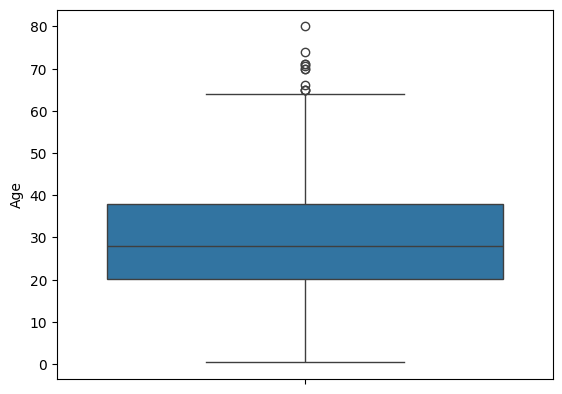

In [30]:
sns.boxplot(df.Age)

<Axes: xlabel='Age', ylabel='Density'>

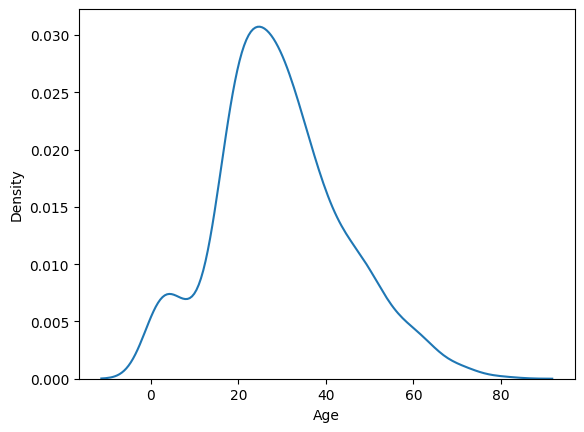

In [31]:
sns.kdeplot(df.Age)

# dropping the outliers

In [33]:
df.loc[~((df.Age>upper_bound)| (df.Age<lower_bound))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Imputing for Outliers

In [34]:
median = df.Age.median()
median

28.0

In [37]:
mean_age = df.loc[(df.Age <upper_bound) & (df.Age >10)]['Age'].mean()
print(f"mean age prior to removing outlier is {mean_age}")

df.Age.loc[df.Age>upper_bound]=mean_age
print(f"mean age after imputing outlier is {df.Age.mean()}")

mean age prior to removing outlier is 31.556338028169016
mean age after imputing outlier is 29.11034974553202


In [38]:
df.Age.loc[df.Age >upper_bound]

Series([], Name: Age, dtype: float64)

<Axes: >

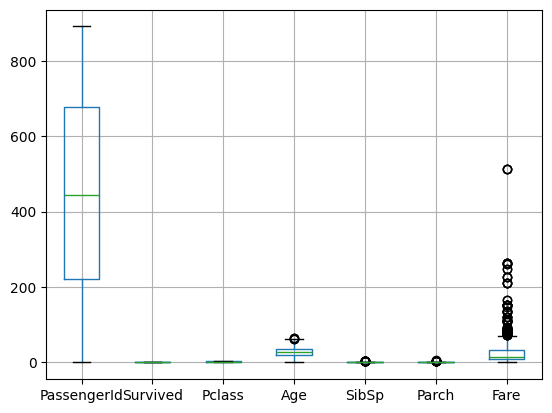

In [39]:
df.boxplot()

<Axes: >

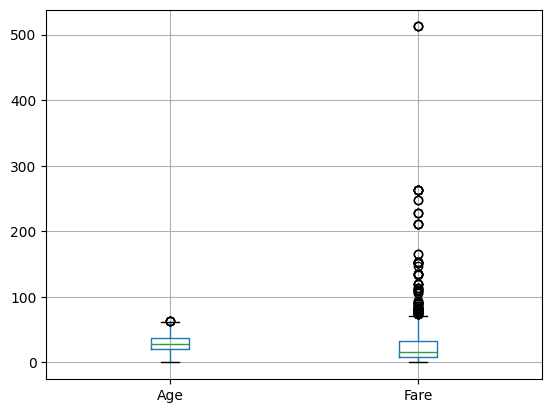

In [40]:
df.boxplot(["Age", "Fare"])